In [1]:
%matplotlib notebook

#Import Libraries
import tensorflow as tf
import numpy as np
import math
import os
import matplotlib
import matplotlib.pyplot as plt
import datetime
import time

import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

from models import save_model, generator, generate_model, plot_performance

Using TensorFlow backend.


In [2]:
X_load = np.load('../data/processed_data/m4015_session2/X_serial.npy')
Y_load = np.load('../data/processed_data/m4015_session2/y_serial.npy')

res = tf.one_hot(Y_load, depth=2)
with tf.Session() as sess:
    Y_load = (sess.run(res))

split_index = int(X_load.shape[0]*0.8)
    
X_train = X_load[:split_index]
Y_train = Y_load[:split_index]
X_val = X_load[split_index:]
Y_val = Y_load[split_index:]


class_weight = {0: 1., 1: 50.,}

<IPython.core.display.Javascript object>


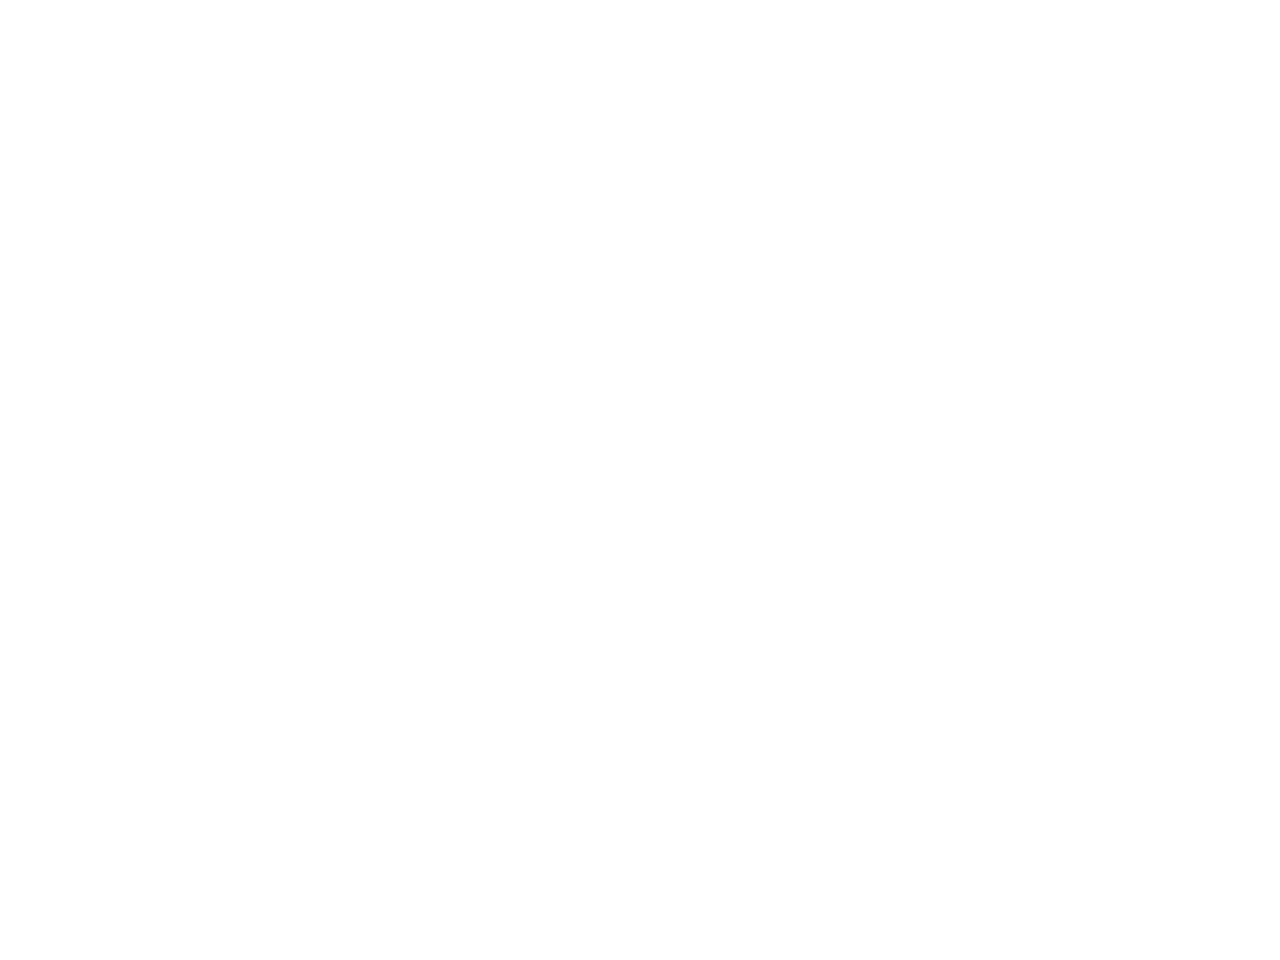

In [3]:


plt.figure()
plt.plot(X_load)
plt.plot(np.argmax(Y_load, axis=1))
plt.show()

In [4]:
batch_size = 1000
n_hidden = 100
n_dim = 1
input_shape = (n_hidden, n_dim)


model = generate_model(input_shape)

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 1)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 6)            48        
_________________________________________________________________
average_pooling1d_1 (Average (None, 50, 6)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 12)            516       
_________________________________________________________________
average_pooling1d_2 (Average (None, 25, 12)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 25, 12)            1020      
_________________________________________________________________
average_pooling1d_3 (Average (None, 12, 12)            0         
__________

In [5]:
train_generator = generator(X_train, Y_train, batch_size, n_hidden)
validate_generator = generator(X_val, Y_val, batch_size, n_hidden)

history = model.fit_generator(train_generator,
                              steps_per_epoch=1000,
                              epochs=20, 
                              verbose=1,
                              validation_data=validate_generator,
                              validation_steps=1000,
                              class_weight=class_weight, )

save_model(model)

Epoch 1/20
1000/1000 [==============================] - 80s 80ms/step - loss: 1.4523 - acc: 0.1870 - val_loss: 0.7724 - val_acc: 0.0162
Epoch 2/20
1000/1000 [==============================] - 80s 80ms/step - loss: 1.4187 - acc: 0.2327 - val_loss: 0.6715 - val_acc: 0.9482
Epoch 3/20
1000/1000 [==============================] - 108s 108ms/step - loss: 1.3896 - acc: 0.6904 - val_loss: 0.8064 - val_acc: 0.0182
Epoch 4/20
1000/1000 [==============================] - 119s 119ms/step - loss: 1.3975 - acc: 0.8433 - val_loss: 0.6548 - val_acc: 0.9447
Epoch 5/20
1000/1000 [==============================] - 126s 126ms/step - loss: 1.3970 - acc: 0.8075 - val_loss: 0.6740 - val_acc: 0.7687
Epoch 6/20
1000/1000 [==============================] - 118s 118ms/step - loss: 1.3942 - acc: 0.8241 - val_loss: 0.5715 - val_acc: 0.9655
Epoch 7/20
1000/1000 [==============================] - 117s 117ms/step - loss: 1.2079 - acc: 0.8595 - val_loss: 0.2848 - val_acc: 0.9520
Epoch 8/20
1000/1000 [================

<IPython.core.display.Javascript object>


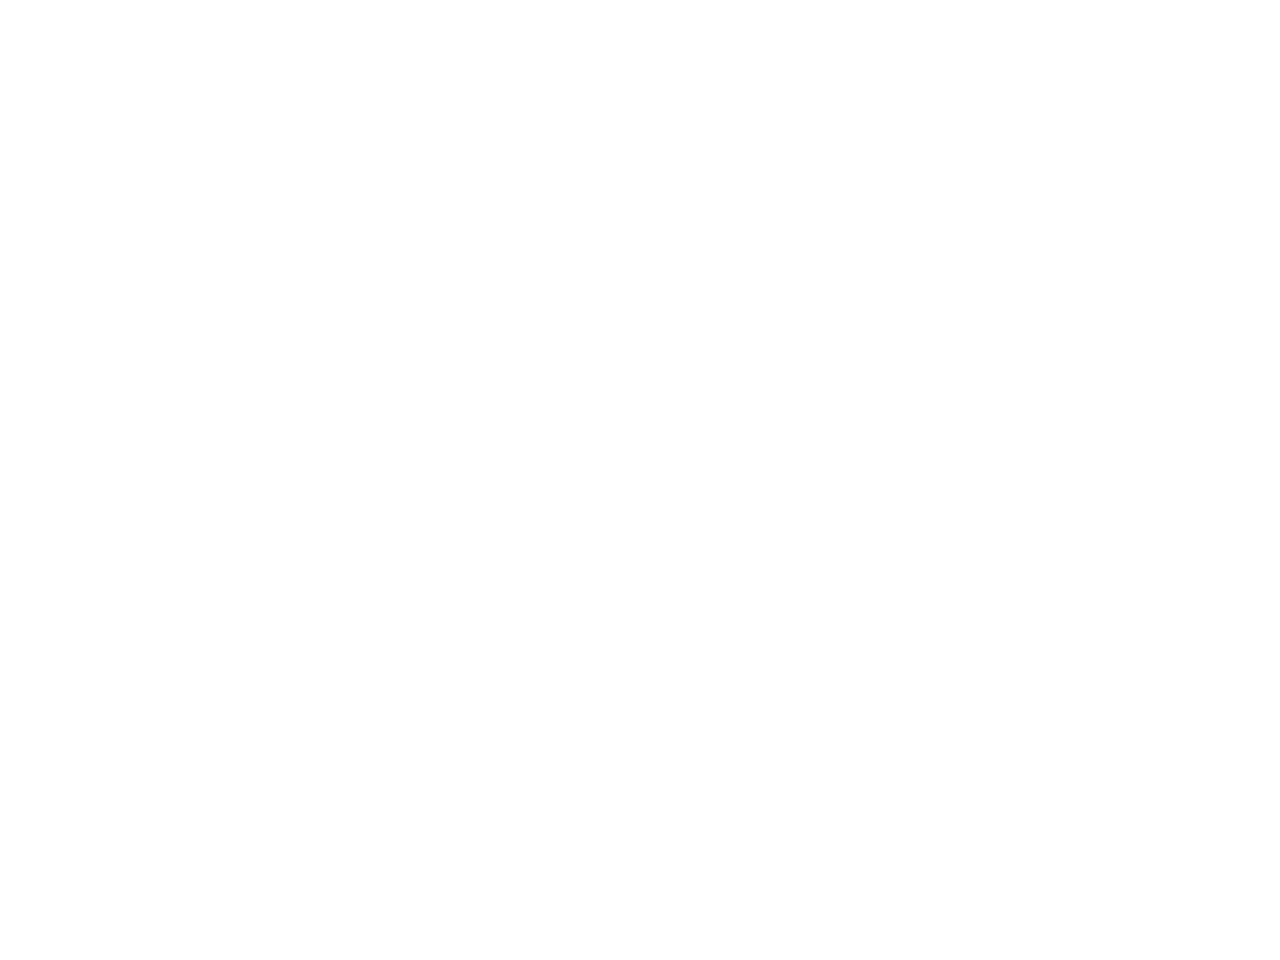

<IPython.core.display.Javascript object>


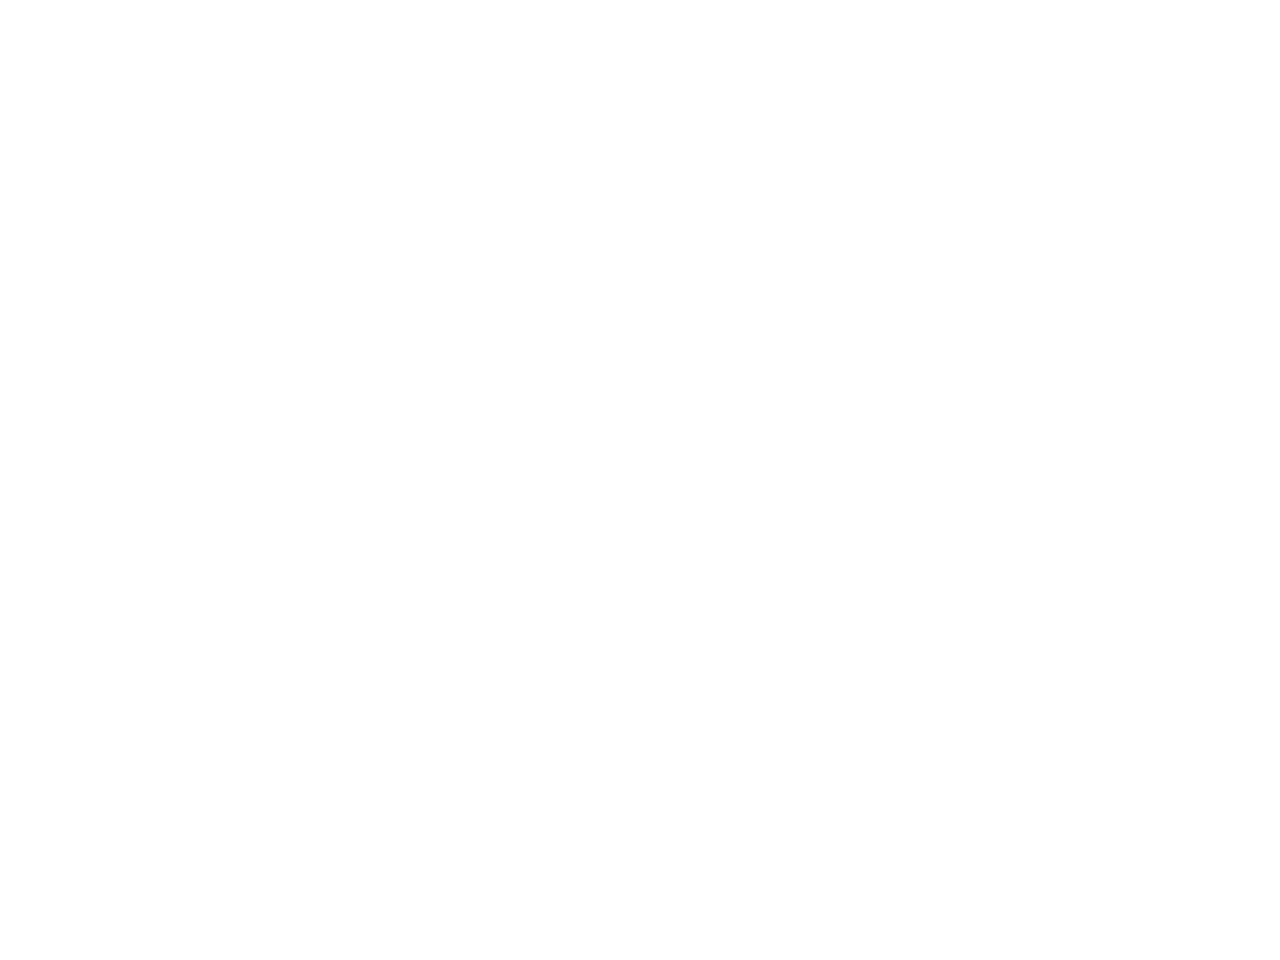

In [6]:
plot_performance(history)

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from models import make_accuracy_matrix_plot

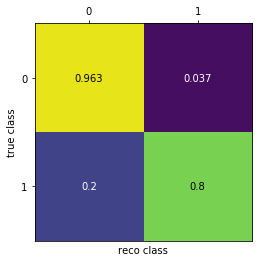

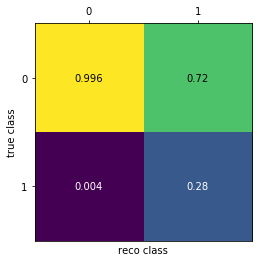

In [8]:
validate_generator = generator(X_val, Y_val, batch_size*10, n_hidden)

make_accuracy_matrix_plot(model, validate_generator)
make_accuracy_matrix_plot(model, validate_generator, ref='est')

In [9]:
save_dir = 'plots'
if not os.path.exists(save_dir):
        os.makedirs(save_dir)

second_dir = 'simple'
save_dir = os.path.join(save_dir, second_dir)  
if not os.path.exists(save_dir):
        os.makedirs(save_dir)




In [39]:
X = X_val
y = np.argmax(Y_val, axis=1)
t = np.arange(X.shape[0])

n_slices = X.shape[0] - n_hidden

all_y = np.zeros((n_slices, 2))

for i in range(n_slices):
    x_input = np.reshape(X[i:i+n_hidden], (1, n_hidden, 1))
    all_y[i] = model.predict(x_input)
    


In [59]:
y_pred_int = np.argmax(all_y, axis=1)

mask = all_y[:,1]>0.992
y_pred_int = np.array(mask, dtype=int)

y_res = np.zeros_like(t)
y_res[int(n_hidden/2):int(-n_hidden/2)] = y_pred_int

<IPython.core.display.Javascript object>


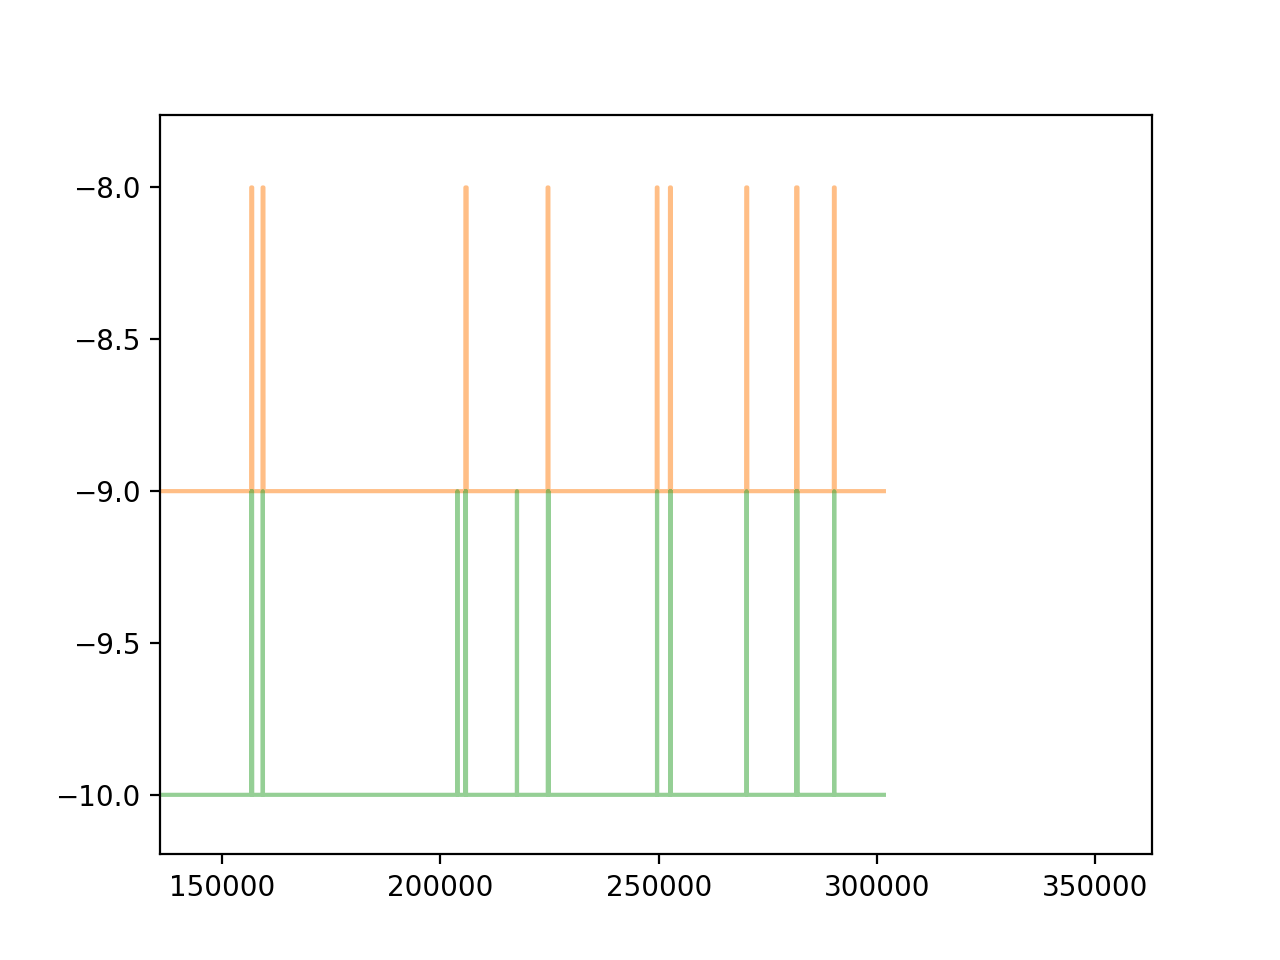

In [61]:
%matplotlib notebook

plt.figure()
plt.plot(t, X)
plt.plot(t, y-9, alpha=0.5)
plt.plot(t, y_res-10, alpha=0.5)
# plt.xlim(100, 50000)
# plt.ylim(-10, -8)
plt.savefig('plots/nice.pdf')
plt.show()

In [24]:
all_y

array([[0.8742336 , 0.12576638],
       [0.8693651 , 0.13063487],
       [0.88251853, 0.1174814 ],
       ...,
       [0.91657281, 0.08342721],
       [0.91476226, 0.0852377 ],
       [0.91235203, 0.08764798]])

<IPython.core.display.Javascript object>


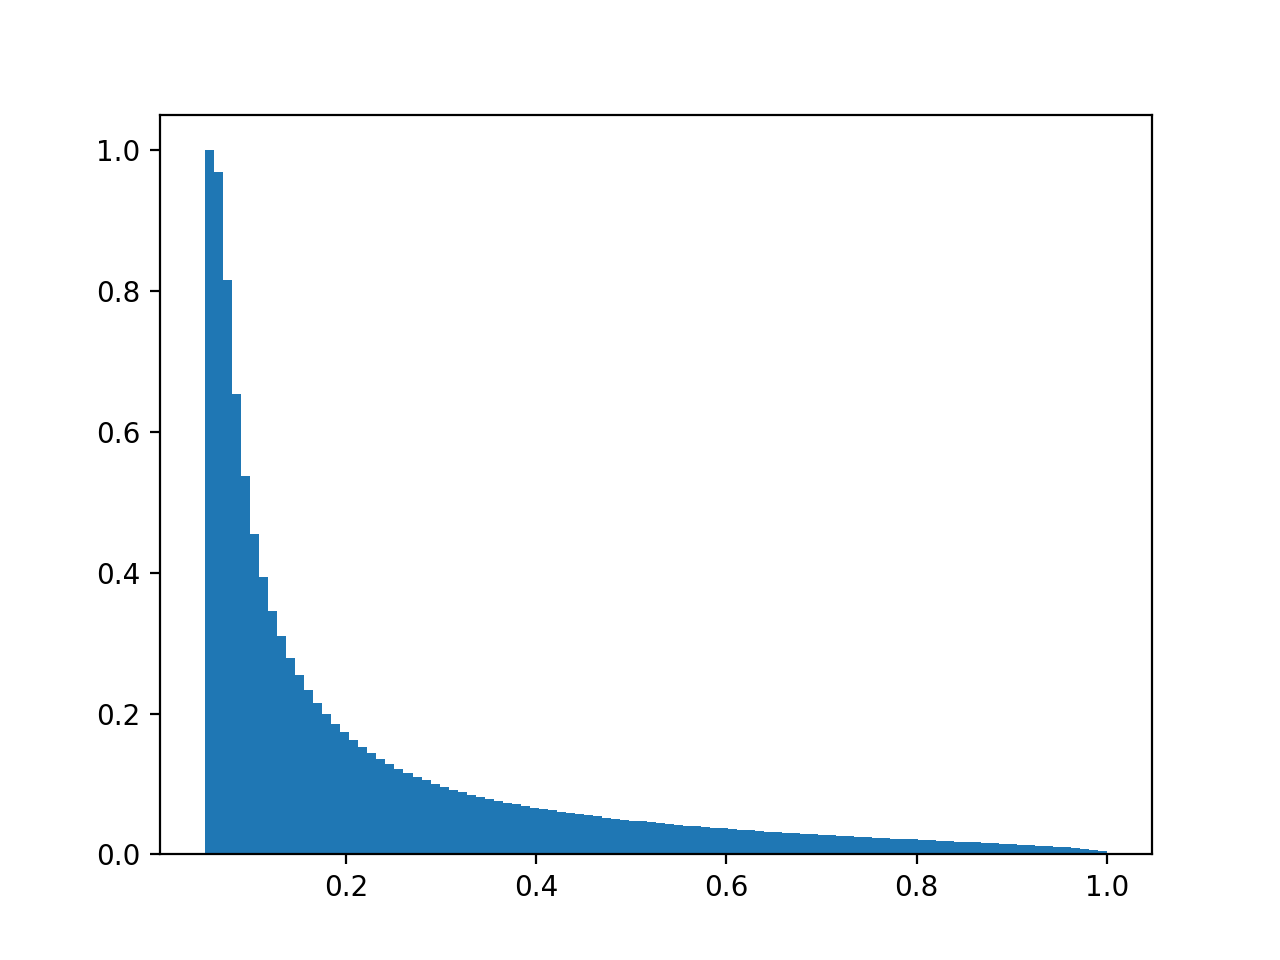

In [33]:
plt.figure()
plt.hist(all_y[:,1], bins=100, cumulative=-1, density=True)
plt.show()

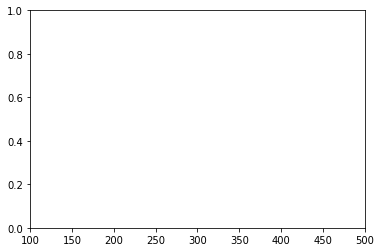

In [12]:
plt.figure()

plt.xlim(100, 500)
plt.show()

In [13]:
all_y

array([[0.8742336 , 0.12576638],
       [0.8693651 , 0.13063487],
       [0.88251853, 0.1174814 ],
       ...,
       [0.91657281, 0.08342721],
       [0.91476226, 0.0852377 ],
       [0.91235203, 0.08764798]])